In [48]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from matplotlib.collections import PatchCollection
import numpy as np
import pandas as pd
import fiona
import json
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from shapely.wkt import dumps, loads

/home/cathyw/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/cathyw/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/cathyw/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/cathyw/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


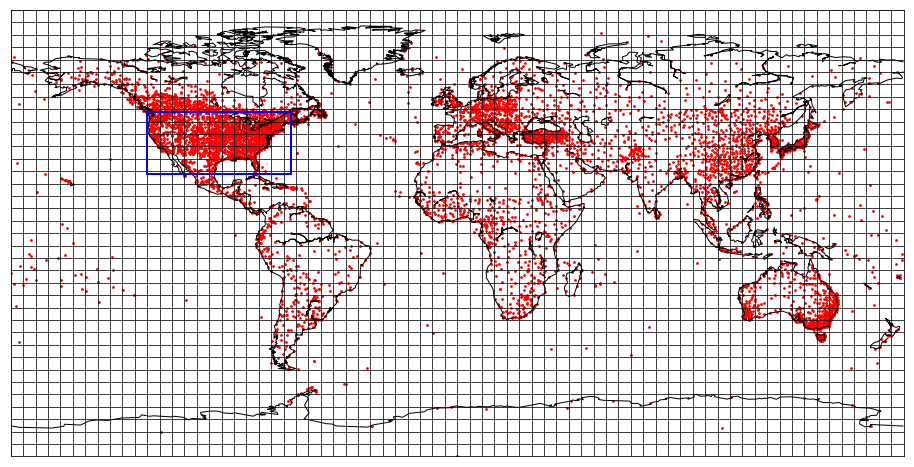

In [29]:
plt.figure(figsize = (16,12))
m = Basemap()
m.readshapefile('5deg/5x5grid_geometric', 'grid')
m.drawcoastlines()
m.scatter(x, y, 3, marker='o', color='red')
m.plot(lngs_us, lats_us, linewidth=2, color='blue')
plt.show()

In [8]:
# bounding coordinates for the U.S. are latitude 24 to 49, longitude -125 to -67
lngs_us = [-125, -67, -67, -125, -125]
lats_us = [24, 24, 49, 49, 24]

In [19]:
grid = pd.DataFrame({'poly': [Polygon(xy) for xy in m.grid],
                     'gridID': [p['SHAPENUM'] for p in m.grid_info]})

In [12]:
grid.head()

,gridID,poly
0,1,"POLYGON ((-180 90, -175 90, -175 85, -180 85, ..."
1,2,"POLYGON ((-180 85, -175 85, -175 80, -180 80, ..."
2,3,"POLYGON ((-180 80, -175 80, -175 75, -180 75, ..."
3,4,"POLYGON ((-180 75, -175 75, -175 70, -180 70, ..."
4,5,"POLYGON ((-180 70, -175 70, -175 65, -180 65, ..."


In [27]:
print(grid['poly'][0])

POLYGON ((-180 90, -175 90, -175 85, -180 85, -180 90))


In [13]:
grid.to_csv('5x5grid.csv', header=True, index=False)

In [14]:
len(m.grid)

2592

In [10]:
locations = pd.read_csv('locations_final.csv', header=0)

In [11]:
locations.head()

,ID,LAT,LON,STNELEV,NAME,GRELEV,POPCLS,POPSIZ,TOPO,STVEG,STLOC,OCNDIS,AIRSTN,TOWNDIS,GRVEG,POPCSS
0,10160355000,36.93,6.95,7.0,SKIKDA,18.0,U,107.0,HI,xx,CO,1.0,x,-9.0,WARM DECIDUOUS,C
1,10160360000,36.83,7.82,4.0,ANNABA,33.0,U,256.0,FL,xx,CO,1.0,A,7.0,WARM CROPS,C
2,10160390000,36.72,3.25,25.0,DAR-EL-BEIDA,34.0,U,1365.0,FL,xx,CO,10.0,A,6.0,WARM CROPS,C
3,10160395001,36.52,4.18,942.0,FT. NATIONAL,805.0,R,-9.0,MV,DE,no,-9.0,x,-9.0,WARM CROPS,A
4,10160400001,36.80,5.10,230.0,CAP CARBON,28.0,R,-9.0,HI,xx,CO,1.0,x,-9.0,WATER,A


In [20]:
x, y = m(locations['LON'].values, locations['LAT'].values)

In [13]:
x2, y2 = m2(locations['LON'].values, locations['LAT'].values)

/home/cathyw/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/cathyw/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


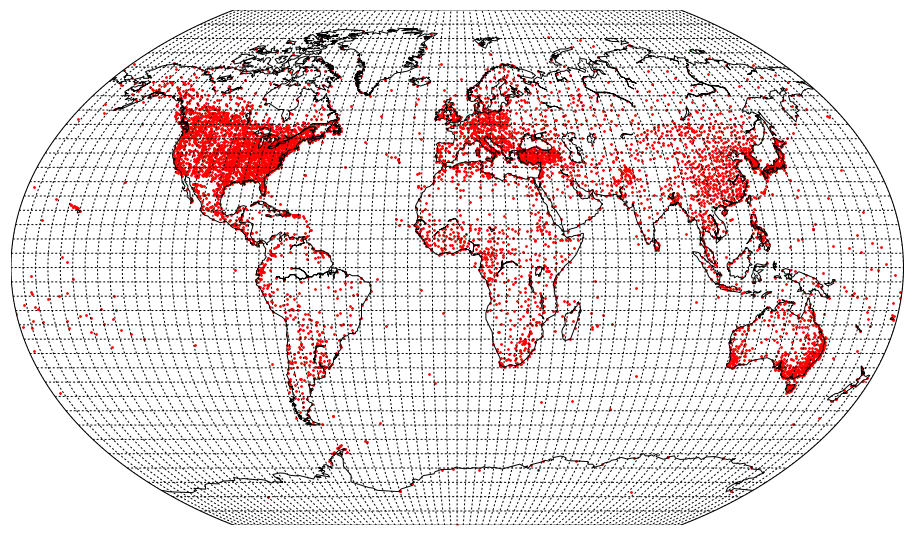

In [14]:
plt.figure(figsize = (16,12))
m2 = Basemap(projection='kav7', lon_0=0)
m2.drawcoastlines()
m2.drawparallels(np.arange(-90,90,5))
m2.drawmeridians(np.arange(-180,180,5))
m2.scatter(x2, y2, 3, marker='o', color='red')
#m2.plot(lngs_us, lats_us, linewidth=2, color='blue', latlon=True)
plt.show()

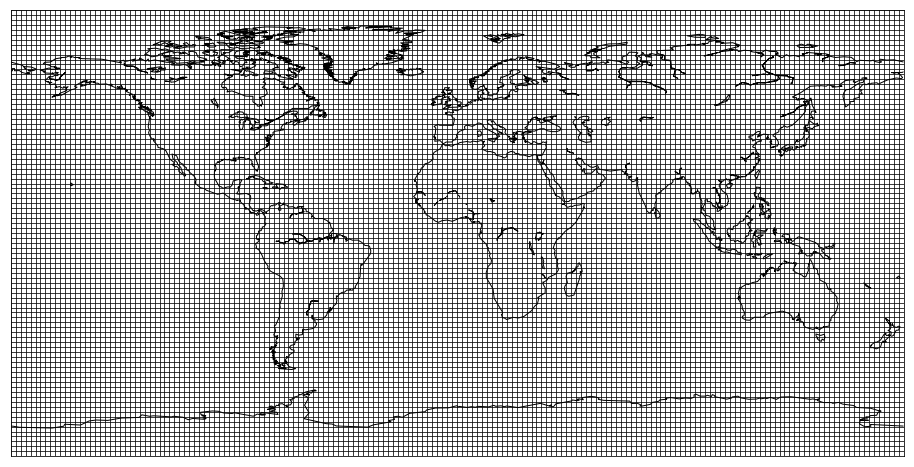

In [2]:
plt.figure(figsize=(16,12))
m3 = Basemap()
m3.readshapefile('2deg/2x2_grid', 'grid2x2')
m3.drawcoastlines()
plt.show()

In [3]:
len(m3.grid2x2)

16200

In [5]:
grid2x2 = pd.DataFrame({'poly': [Polygon(xy) for xy in m3.grid2x2],
                        'gridID': [p['SHAPENUM'] for p in m3.grid2x2_info]})

In [6]:
grid2x2.head()

,gridID,poly
0,1,"POLYGON ((-180 90, -178 90, -178 88, -180 88, ..."
1,2,"POLYGON ((-180 88, -178 88, -178 86, -180 86, ..."
2,3,"POLYGON ((-180 86, -178 86, -178 84, -180 84, ..."
3,4,"POLYGON ((-180 84, -178 84, -178 82, -180 82, ..."
4,5,"POLYGON ((-180 82, -178 82, -178 80, -180 80, ..."


In [7]:
grid2x2.to_csv('2x2grid.csv', header=True, index=False)

/home/cathyw/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/cathyw/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


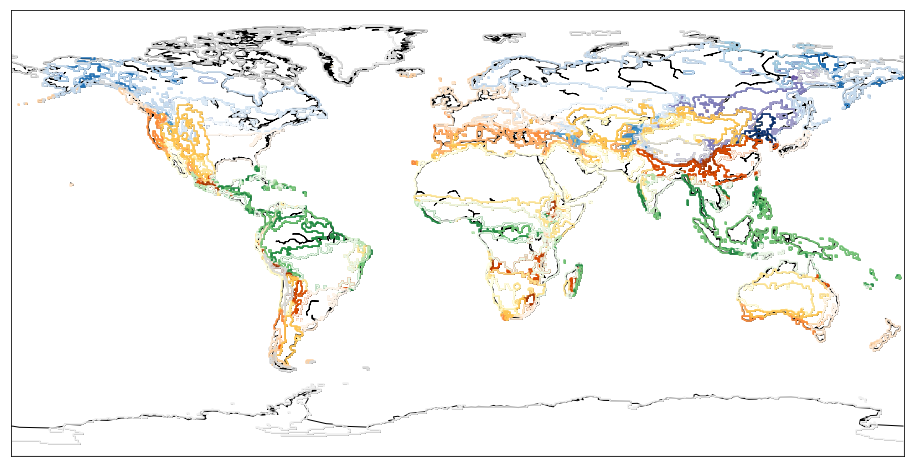

In [46]:
plt.figure(figsize=(16,12))
m4 = Basemap()
m4.drawcoastlines()
m4.readshapefile('stuff/climate_zones', 'zones')
for info, shape in zip(m4.zones_info, m4.zones):
    x,y = zip(*shape)
    m4.plot(x, y, marker=None, color=ccolors[str(info['GRIDCODE'])])
plt.show()

In [44]:
with open('climate_colors.json') as f:
    ccolors = json.load(f)

In [45]:
ccolors

{'11': '#74c476',
 '12': '#238b45',
 '13': '#bae4b3',
 '14': '#edf8e9',
 '21': '#fff7bc',
 '22': '#ffffe5',
 '26': '#fec44f',
 '27': '#fee391',
 '31': '#fff5eb',
 '32': '#fee6ce',
 '33': '#fdd0a2',
 '34': '#fdae6b',
 '35': '#fd8d3c',
 '36': '#f16913',
 '37': '#d94801',
 '38': '#a63603',
 '39': '#7f2704',
 '41': '#f7fbff',
 '42': '#deebf7',
 '43': '#c6dbef',
 '44': '#9ecae1',
 '45': '#6baed6',
 '46': '#4292c6',
 '47': '#2171b5',
 '48': '#08519c',
 '49': '#08306b',
 '50': '#9e9ac8',
 '51': '#807dba',
 '52': '#6a51a3',
 '61': '#f0f0f0',
 '62': '#d9d9d9'}

In [16]:
len(m4.zones)

2458

In [18]:
m4.zones_info

[{'GRIDCODE': 62, 'ID': 1, 'RINGNUM': 1, 'SHAPENUM': 1},
 {'GRIDCODE': 62, 'ID': 2, 'RINGNUM': 1, 'SHAPENUM': 2},
 {'GRIDCODE': 62, 'ID': 3, 'RINGNUM': 1, 'SHAPENUM': 3},
 {'GRIDCODE': 62, 'ID': 4, 'RINGNUM': 1, 'SHAPENUM': 4},
 {'GRIDCODE': 61, 'ID': 5, 'RINGNUM': 1, 'SHAPENUM': 5},
 {'GRIDCODE': 62, 'ID': 6, 'RINGNUM': 1, 'SHAPENUM': 6},
 {'GRIDCODE': 61, 'ID': 7, 'RINGNUM': 1, 'SHAPENUM': 7},
 {'GRIDCODE': 61, 'ID': 8, 'RINGNUM': 1, 'SHAPENUM': 8},
 {'GRIDCODE': 62, 'ID': 9, 'RINGNUM': 1, 'SHAPENUM': 9},
 {'GRIDCODE': 62, 'ID': 10, 'RINGNUM': 1, 'SHAPENUM': 10},
 {'GRIDCODE': 62, 'ID': 11, 'RINGNUM': 1, 'SHAPENUM': 11},
 {'GRIDCODE': 61, 'ID': 12, 'RINGNUM': 1, 'SHAPENUM': 12},
 {'GRIDCODE': 62, 'ID': 13, 'RINGNUM': 1, 'SHAPENUM': 13},
 {'GRIDCODE': 61, 'ID': 14, 'RINGNUM': 1, 'SHAPENUM': 14},
 {'GRIDCODE': 61, 'ID': 15, 'RINGNUM': 1, 'SHAPENUM': 15},
 {'GRIDCODE': 61, 'ID': 16, 'RINGNUM': 1, 'SHAPENUM': 16},
 {'GRIDCODE': 61, 'ID': 17, 'RINGNUM': 1, 'SHAPENUM': 17},
 {'GRIDCODE': 6

In [23]:
zones = pd.DataFrame({'gridID': [p['SHAPENUM'] for p in m4.zones_info],
                      'poly': [Polygon(x) for x in m4.zones],
                      'zone_numcode': [p['GRIDCODE'] for p in m4.zones_info]})

In [40]:
zones.head()

,gridID,poly,zone_numcode,zone_code,climate,precip,temp
0,1,"POLYGON ((-37.5 83.5, -38 83.5, -38 84, -37.5 ...",62,ET,polar,None,polar tundra
1,2,"POLYGON ((-29.5 83.5, -37 83.5, -37 84, -29.5 ...",62,ET,polar,None,polar tundra
2,3,"POLYGON ((-46 83, -46 83.5, -44 83.5, -44 83, ...",62,ET,polar,None,polar tundra
3,4,"POLYGON ((-42.5 83.5, -39.5 83.5, -39.5 83, -4...",62,ET,polar,None,polar tundra
4,5,"POLYGON ((55.5 81, 55.5 81.5, 56 81.5, 56 81, ...",61,EF,polar,None,polar frost


In [27]:
with open('climate_translation.json') as f:
    ctrans = json.load(f)

In [28]:
ctrans

{'11': {'climate': 'equatorial',
  'code': 'Af',
  'precip': 'fully humid',
  'temp': 'None'},
 '12': {'climate': 'equatorial',
  'code': 'Am',
  'precip': 'monsoonal',
  'temp': 'None'},
 '13': {'climate': 'equatorial',
  'code': 'As',
  'precip': 'summer dry',
  'temp': 'None'},
 '14': {'climate': 'equatorial',
  'code': 'Aw',
  'precip': 'winter dry',
  'temp': 'None'},
 '21': {'climate': 'arid',
  'code': 'BWk',
  'precip': 'desert',
  'temp': 'cold arid'},
 '22': {'climate': 'arid',
  'code': 'BWh',
  'precip': 'desert',
  'temp': 'hot arid'},
 '26': {'climate': 'arid',
  'code': 'BSk',
  'precip': 'steppe',
  'temp': 'cold arid'},
 '27': {'climate': 'arid',
  'code': 'BSh',
  'precip': 'steppe',
  'temp': 'hot arid'},
 '31': {'climate': 'warm temperate',
  'code': 'Cfa',
  'precip': 'fully humid',
  'temp': 'hot summer'},
 '32': {'climate': 'warm temperate',
  'code': 'Cfb',
  'precip': 'fully humid',
  'temp': 'warm summer'},
 '33': {'climate': 'warm temperate',
  'code': 'Cfc',

In [29]:
ctrans['12']['climate']

'equatorial'

In [31]:
zones['zone_code'] = [ctrans[str(g)]['code'] for g in zones['zone_numcode']]

In [33]:
zones['climate'] = [ctrans[str(g)]['climate'] for g in zones['zone_numcode']]

In [34]:
zones['precip'] = [ctrans[str(g)]['precip'] for g in zones['zone_numcode']]

In [35]:
zones['temp'] = [ctrans[str(g)]['temp'] for g in zones['zone_numcode']]

In [41]:
zones.to_csv('climate_zones.csv', header=True, index=False)

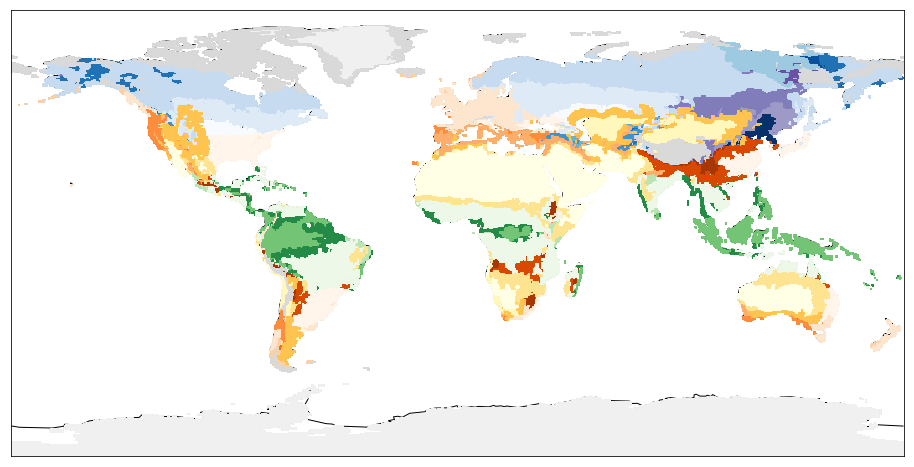

In [51]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
m5 = Basemap()
m5.drawcoastlines()
m5.readshapefile('stuff/climate_zones', 'zones')
patches = []
colors = []
for info, shape in zip(m5.zones_info, m5.zones):
    patches.append(mpatch.Polygon(np.array(shape), True))
    colors.append(ccolors[str(info['GRIDCODE'])])
ax.add_collection(PatchCollection(patches, facecolor=colors, edgecolor=colors, linewidths=1, zorder=2))
plt.show()